# Аспектный анализ тональности текстов

* [1] https://github.com/nlpub/pymystem3
* [2] SentiRuEval2015
* [3] https://rusvectores.org/ru/models/

In [1]:
# Если Вы запускаете ноутбук на colab,
# выполните следующие строчки, чтобы подгрузить библиотеку dlnlputils:

# !git clone https://github.com/Samsung-IT-Academy/stepik-dl-nlp.git
import sys; sys.path.append('/Users/evagolubenko/Documents/try_python/sumsung-dl-nlp_(stepik)/')

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(1)

## Оригинальная разметка

In [7]:
# Если Вы запускаете ноутбук на colab, добавьте в начало пути /content/stepik-dl-nlp
xml_sentiments = '/Users/evagolubenko/Documents/try_python/sumsung-dl-nlp_(stepik)/datasets/sentirueval2015/SentiRuEval_car_markup_train.xml'

In [8]:
from dlnlputils.sentiment_utils import parse_xml_sentiment, parse_xml_aspect, show_markup

тексты с разметкой аспектов и тональностей: 

In [9]:
texts_w_sentiment_spans = parse_xml_sentiment(xml_sentiments)
texts_w_aspect_spans    = parse_xml_aspect(xml_sentiments)

In [10]:
amount = len(texts_w_sentiment_spans)

print('Загружено {} текстов с разметкой тональности\n'.format(amount))

Загружено 217 текстов с разметкой тональности



##### выберем 2 текста, на которых будем рассматривать все примеры:

In [11]:
random_picks = [random.randint(0,amount-1) for _ in range(0,2)]

####  тональность (sentiment)

In [12]:
for rand_i in random_picks:
    text, spans = texts_w_sentiment_spans[rand_i]
    
    print('Текст №:',rand_i)
    show_markup(text,spans)

Текст №: 54


BoxMarkup('Приобрели данное авто полгода назад. 1974 года, но авто в прекрасном состоянии. Сразу видно, что качество сборки идеальное. Машина на века. Скорость не его стихия. Не совсем хорошая поворотливость. На трассе особо не покатаешься, трудно обгонять. Расход топлива довольно умеренный. Каков хозяин, такое и авто. Хоть автомобилю и 40 лет, но работает неплохо. В зимнее время лучше использовать предпусковой двигатель, иначе не поедет. Пяти посадочных мест вполне хватает. Общее впечатление : Живучая лошадка',
          [Span(17, 21, 'neutral'),
           Span(51, 55, 'positive'),
           Span(97, 112, 'positive'),
           Span(124, 130, 'positive'),
           Span(140, 148, 'negative'),
           Span(182, 196, 'negative'),
           Span(198, 207, 'negative'),
           Span(237, 245, 'negative'),
           Span(247, 261, 'positive'),
           Span(304, 308, 'neutral'),
           Span(315, 325, 'positive'),
           Span(339, 347, 'positive'),
           Span(391, 413, 'negative'),
           Span(415, 430, 'negative'),
           Span(437, 452, 'neutral'),
           Span(489, 496, 'positive')])

Текст №: 93


BoxMarkup('Дэу Эсперо наверное самая капризная модель из всего ряда Дэу. Почему капризная, да потому-что изначально у этой модели электроника барахлит, двигателя частенько дают "клина", а кузовное железо дефицит, да и к тому-же быстро ржавеет, практически не по годам, а по дням. Салон просторный, обзор хороший, клиренс средний, багажник большой, всё под руками, вот наверное весь плюс модели. Для тех, кто решил взять в качестве первого авто, он в принципе подойдёт, но готовьтесь вкладывать и вкладывать в авто, так-как в хорошем состоянии авто единицы и авто-разборка Ваш друг на долго, да и запчасти не сказать, что дёшево, особенно кузовное железо, его в отличном состоянии практически не найти. Выход есть:Китайская кузовщина, рихтуется отлично-"фольга", но и гнётся от руки. "Муха села и айда!" Сиденья удобные вполне, но лучше сразу прикупить чехлы, так-как пачкаются мгновенно. Двигателя конечно имеют нарекания не только у владельцев, но и у слесарей, которые их ремонтируют. МКПП живучие в меру, если их не рвать. Подвеска среднего качества, но за пару сезонов можно "просадить" по нашим дорогам. Электрика просто супер!-автоэлектрики не охотно любят связываться с данной моделью, а если берут на ремонт, то частенько плюются. В общем машинка не плохая, если в одних руках и бережно эксплуатируется, но на рынке в хорошем состоянии трудно найти, нежели в отличном или идеальном, в основном уже чермет на колесах. ',
          [Span(0, 10, 'negative'),
           Span(26, 35, 'negative'),
           Span(36, 42, 'negative'),
           Span(57, 60, 'neutral'),
           Span(69, 78, 'negative'),
           Span(119, 130, 'negative'),
           Span(131, 139, 'negative'),
           Span(141, 150, 'negative'),
           Span(177, 192, 'negative'),
           Span(224, 231, 'negative'),
           Span(269, 274, 'positive'),
           Span(275, 285, 'positive'),
           Span(287, 292, 'positive'),
           Span(302, 309, 'neutral'),
           Span(319, 327, 'positive'),
           Span(376, 382, 'negative'),
           Span(428, 432, 'both'),
           Span(485, 502, 'negative'),
           Span(532, 536, 'neutral'),
           Span(585, 593, 'negative'),
           Span(594, 616, 'negative'),
           Span(627, 642, 'negative'),
           Span(702, 721, 'negative'),
           Span(756, 770, 'negative'),
           Span(792, 799, 'both'),
           Span(800, 807, 'positive'),
           Span(856, 865, 'negative'),
           Span(877, 886, 'negative'),
           Span(976, 980, 'positive'),
           Span(1015, 1023, 'negative'),
           Span(1098, 1107, 'positive'),
           Span(1173, 1180, 'negative'),
           Span(1236, 1243, 'both'),
           Span(1395, 1412, 'negative')])

####  Аспекты (aspects)

In [13]:
for rand_i in random_picks:
    text,spans = texts_w_aspect_spans[rand_i]
    
    print('Текст №:',rand_i)
    show_markup(text,spans)

Текст №: 54


BoxMarkup('Приобрели данное авто полгода назад. 1974 года, но авто в прекрасном состоянии. Сразу видно, что качество сборки идеальное. Машина на века. Скорость не его стихия. Не совсем хорошая поворотливость. На трассе особо не покатаешься, трудно обгонять. Расход топлива довольно умеренный. Каков хозяин, такое и авто. Хоть автомобилю и 40 лет, но работает неплохо. В зимнее время лучше использовать предпусковой двигатель, иначе не поедет. Пяти посадочных мест вполне хватает. Общее впечатление : Живучая лошадка',
          [Span(17, 21, 'Whole'),
           Span(51, 55, 'Reliability'),
           Span(97, 112, 'Reliability'),
           Span(124, 130, 'Reliability'),
           Span(140, 148, 'Driveability'),
           Span(182, 196, 'Driveability'),
           Span(198, 207, 'Driveability'),
           Span(237, 245, 'Driveability'),
           Span(247, 261, 'Driveability'),
           Span(304, 308, 'Whole'),
           Span(315, 325, 'Reliability'),
           Span(339, 347, 'Reliability'),
           Span(391, 413, 'Driveability'),
           Span(415, 430, 'Driveability'),
           Span(437, 452, 'Comfort'),
           Span(489, 496, 'Reliability')])

Текст №: 93


BoxMarkup('Дэу Эсперо наверное самая капризная модель из всего ряда Дэу. Почему капризная, да потому-что изначально у этой модели электроника барахлит, двигателя частенько дают "клина", а кузовное железо дефицит, да и к тому-же быстро ржавеет, практически не по годам, а по дням. Салон просторный, обзор хороший, клиренс средний, багажник большой, всё под руками, вот наверное весь плюс модели. Для тех, кто решил взять в качестве первого авто, он в принципе подойдёт, но готовьтесь вкладывать и вкладывать в авто, так-как в хорошем состоянии авто единицы и авто-разборка Ваш друг на долго, да и запчасти не сказать, что дёшево, особенно кузовное железо, его в отличном состоянии практически не найти. Выход есть:Китайская кузовщина, рихтуется отлично-"фольга", но и гнётся от руки. "Муха села и айда!" Сиденья удобные вполне, но лучше сразу прикупить чехлы, так-как пачкаются мгновенно. Двигателя конечно имеют нарекания не только у владельцев, но и у слесарей, которые их ремонтируют. МКПП живучие в меру, если их не рвать. Подвеска среднего качества, но за пару сезонов можно "просадить" по нашим дорогам. Электрика просто супер!-автоэлектрики не охотно любят связываться с данной моделью, а если берут на ремонт, то частенько плюются. В общем машинка не плохая, если в одних руках и бережно эксплуатируется, но на рынке в хорошем состоянии трудно найти, нежели в отличном или идеальном, в основном уже чермет на колесах. ',
          [Span(0, 10, 'Reliability'),
           Span(26, 35, 'Reliability'),
           Span(36, 42, 'Reliability'),
           Span(57, 60, 'Reliability'),
           Span(69, 78, 'Reliability'),
           Span(119, 130, 'Reliability'),
           Span(131, 139, 'Reliability'),
           Span(141, 150, 'Reliability'),
           Span(177, 192, 'Reliability'),
           Span(224, 231, 'Reliability'),
           Span(269, 274, 'Comfort'),
           Span(275, 285, 'Comfort'),
           Span(287, 292, 'Safety'),
           Span(302, 309, 'Driveability'),
           Span(319, 327, 'Comfort'),
           Span(376, 382, 'Whole'),
           Span(428, 432, 'Whole'),
           Span(485, 502, 'Costs'),
           Span(532, 536, 'Whole'),
           Span(585, 593, 'Costs'),
           Span(594, 616, 'Costs'),
           Span(627, 642, 'Costs'),
           Span(702, 721, 'Safety'),
           Span(756, 770, 'Reliability'),
           Span(792, 799, 'Comfort'),
           Span(800, 807, 'Comfort'),
           Span(856, 865, 'Comfort'),
           Span(877, 886, 'Reliability'),
           Span(976, 980, 'Reliability'),
           Span(1015, 1023, 'Reliability'),
           Span(1098, 1107, 'Reliability'),
           Span(1173, 1180, 'Reliability'),
           Span(1236, 1243, 'Whole'),
           Span(1395, 1412, 'Whole')])

## BIO-тэги для обучения модели

In [14]:
from dlnlputils.sentiment_utils import fill_gaps, extract_BIO_tagged_tokens

In [15]:
for rand_i in random_picks:
    text, aspect_spans = texts_w_aspect_spans[rand_i]
    cover_spans       = fill_gaps(text, aspect_spans)
    
    print('Полное покрытие разметкой текста №:',rand_i) 
    show_markup(text, cover_spans)

Полное покрытие разметкой текста №: 54


BoxMarkup('Приобрели данное авто полгода назад. 1974 года, но авто в прекрасном состоянии. Сразу видно, что качество сборки идеальное. Машина на века. Скорость не его стихия. Не совсем хорошая поворотливость. На трассе особо не покатаешься, трудно обгонять. Расход топлива довольно умеренный. Каков хозяин, такое и авто. Хоть автомобилю и 40 лет, но работает неплохо. В зимнее время лучше использовать предпусковой двигатель, иначе не поедет. Пяти посадочных мест вполне хватает. Общее впечатление : Живучая лошадка',
          [Span(0, 17, 'Other'),
           Span(17, 21, 'Whole'),
           Span(21, 51, 'Other'),
           Span(51, 55, 'Reliability'),
           Span(55, 97, 'Other'),
           Span(97, 112, 'Reliability'),
           Span(112, 124, 'Other'),
           Span(124, 130, 'Reliability'),
           Span(130, 140, 'Other'),
           Span(140, 148, 'Driveability'),
           Span(148, 182, 'Other'),
           Span(182, 196, 'Driveability'),
           Span(196, 198, 'Other'),
           Span(198, 207, 'Driveability'),
           Span(207, 237, 'Other'),
           Span(237, 245, 'Driveability'),
           Span(245, 247, 'Other'),
           Span(247, 261, 'Driveability'),
           Span(261, 304, 'Other'),
           Span(304, 308, 'Whole'),
           Span(308, 315, 'Other'),
           Span(315, 325, 'Reliability'),
           Span(325, 339, 'Other'),
           Span(339, 347, 'Reliability'),
           Span(347, 391, 'Other'),
           Span(391, 413, 'Driveability'),
           Span(413, 415, 'Other'),
           Span(415, 430, 'Driveability'),
           Span(430, 437, 'Other'),
           Span(437, 452, 'Comfort'),
           Span(452, 489, 'Other'),
           Span(489, 496, 'Reliability'),
           Span(496, 504, 'Other')])

Полное покрытие разметкой текста №: 93


BoxMarkup('Дэу Эсперо наверное самая капризная модель из всего ряда Дэу. Почему капризная, да потому-что изначально у этой модели электроника барахлит, двигателя частенько дают "клина", а кузовное железо дефицит, да и к тому-же быстро ржавеет, практически не по годам, а по дням. Салон просторный, обзор хороший, клиренс средний, багажник большой, всё под руками, вот наверное весь плюс модели. Для тех, кто решил взять в качестве первого авто, он в принципе подойдёт, но готовьтесь вкладывать и вкладывать в авто, так-как в хорошем состоянии авто единицы и авто-разборка Ваш друг на долго, да и запчасти не сказать, что дёшево, особенно кузовное железо, его в отличном состоянии практически не найти. Выход есть:Китайская кузовщина, рихтуется отлично-"фольга", но и гнётся от руки. "Муха села и айда!" Сиденья удобные вполне, но лучше сразу прикупить чехлы, так-как пачкаются мгновенно. Двигателя конечно имеют нарекания не только у владельцев, но и у слесарей, которые их ремонтируют. МКПП живучие в меру, если их не рвать. Подвеска среднего качества, но за пару сезонов можно "просадить" по нашим дорогам. Электрика просто супер!-автоэлектрики не охотно любят связываться с данной моделью, а если берут на ремонт, то частенько плюются. В общем машинка не плохая, если в одних руках и бережно эксплуатируется, но на рынке в хорошем состоянии трудно найти, нежели в отличном или идеальном, в основном уже чермет на колесах. ',
          [Span(0, 10, 'Reliability'),
           Span(10, 26, 'Other'),
           Span(26, 35, 'Reliability'),
           Span(35, 36, 'Other'),
           Span(36, 42, 'Reliability'),
           Span(42, 57, 'Other'),
           Span(57, 60, 'Reliability'),
           Span(60, 69, 'Other'),
           Span(69, 78, 'Reliability'),
           Span(78, 119, 'Other'),
           Span(119, 130, 'Reliability'),
           Span(130, 131, 'Other'),
           Span(131, 139, 'Reliability'),
           Span(139, 141, 'Other'),
           Span(141, 150, 'Reliability'),
           Span(150, 177, 'Other'),
           Span(177, 192, 'Reliability'),
           Span(192, 224, 'Other'),
           Span(224, 231, 'Reliability'),
           Span(231, 269, 'Other'),
           Span(269, 274, 'Comfort'),
           Span(274, 275, 'Other'),
           Span(275, 285, 'Comfort'),
           Span(285, 287, 'Other'),
           Span(287, 292, 'Safety'),
           Span(292, 302, 'Other'),
           Span(302, 309, 'Driveability'),
           Span(309, 319, 'Other'),
           Span(319, 327, 'Comfort'),
           Span(327, 376, 'Other'),
           Span(376, 382, 'Whole'),
           Span(382, 428, 'Other'),
           Span(428, 432, 'Whole'),
           Span(432, 485, 'Other'),
           Span(485, 502, 'Costs'),
           Span(502, 532, 'Other'),
           Span(532, 536, 'Whole'),
           Span(536, 585, 'Other'),
           Span(585, 593, 'Costs'),
           Span(593, 594, 'Other'),
           Span(594, 616, 'Costs'),
           Span(616, 627, 'Other'),
           Span(627, 642, 'Costs'),
           Span(642, 702, 'Other'),
           Span(702, 721, 'Safety'),
           Span(721, 756, 'Other'),
           Span(756, 770, 'Reliability'),
           Span(770, 792, 'Other'),
           Span(792, 799, 'Comfort'),
           Span(799, 800, 'Other'),
           Span(800, 807, 'Comfort'),
           Span(807, 856, 'Other'),
           Span(856, 865, 'Comfort'),
           Span(865, 877, 'Other'),
           Span(877, 886, 'Reliability'),
           Span(886, 976, 'Other'),
           Span(976, 980, 'Reliability'),
           Span(980, 1015, 'Other'),
           Span(1015, 1023, 'Reliability'),
           Span(1023, 1098, 'Other'),
           Span(1098, 1107, 'Reliability'),
           Span(1107, 1173, 'Other'),
           Span(1173, 1180, 'Reliability'),
           Span(1180, 1236, 'Other'),
           Span(1236, 1243, 'Whole'),
           Span(1243, 1395, 'Other'),
           Span(1395, 1412, 'Whole'),
           Span(1412, 1414, 'Other')])

### Разбиение текста на предложения, а предложений - на слова.

In [16]:
from dlnlputils.sentiment_utils import regex_sentence_detector, sentence_spans,sentence_splitter

In [17]:
from nltk.tokenize import RegexpTokenizer

word_tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')

In [18]:
for rand_i in random_picks:
    text, aspect_spans = texts_w_aspect_spans[rand_i]

    print('Разбиение на предложения и BIO токенизация текста №:',rand_i) 
    for sentence, spans in sentence_splitter(text, aspect_spans):

        cover_spans      = fill_gaps(sentence,spans)
        tokens_w_biotags = extract_BIO_tagged_tokens(sentence, 
                                                     cover_spans, 
                                                     word_tokenizer.tokenize)

        show_markup(sentence, cover_spans)
        print(tokens_w_biotags[:10],'\n')

Разбиение на предложения и BIO токенизация текста №: 54


BoxMarkup('Приобрели данное авто полгода назад.',
          [Span(0, 17, 'Other'), Span(17, 21, 'Whole'), Span(21, 36, 'Other')])

[('Приобрели', 'Other'), ('данное', 'Other'), ('авто', 'B-Whole'), ('полгода', 'Other'), ('назад', 'Other'), ('.', 'Other')] 



BoxMarkup('1974 года, но авто в прекрасном состоянии.',
          [Span(0, 14, 'Other'),
           Span(14, 18, 'Reliability'),
           Span(18, 42, 'Other')])

[('1974', 'Other'), ('года', 'Other'), (',', 'Other'), ('но', 'Other'), ('авто', 'B-Reliability'), ('в', 'Other'), ('прекрасном', 'Other'), ('состоянии', 'Other'), ('.', 'Other')] 



BoxMarkup('Сразу видно, что качество сборки идеальное.',
          [Span(0, 17, 'Other'),
           Span(17, 32, 'Reliability'),
           Span(32, 43, 'Other')])

[('Сразу', 'Other'), ('видно', 'Other'), (',', 'Other'), ('что', 'Other'), ('качество', 'B-Reliability'), ('сборки', 'I-Reliability'), ('идеальное', 'Other'), ('.', 'Other')] 



BoxMarkup('Машина на века.', [Span(0, 6, 'Reliability'), Span(6, 15, 'Other')])

[('Машина', 'B-Reliability'), ('на', 'Other'), ('века', 'Other'), ('.', 'Other')] 



BoxMarkup('Скорость не его стихия.',
          [Span(0, 8, 'Driveability'), Span(8, 23, 'Other')])

[('Скорость', 'B-Driveability'), ('не', 'Other'), ('его', 'Other'), ('стихия', 'Other'), ('.', 'Other')] 



BoxMarkup('Не совсем хорошая поворотливость.',
          [Span(0, 18, 'Other'), Span(18, 32, 'Driveability')])

[('Не', 'Other'), ('совсем', 'Other'), ('хорошая', 'Other'), ('поворотливость', 'B-Driveability')] 



BoxMarkup('На трассе особо не покатаешься, трудно обгонять.',
          [Span(0, 9, 'Driveability'),
           Span(9, 39, 'Other'),
           Span(39, 47, 'Driveability')])

[('На', 'B-Driveability'), ('трассе', 'I-Driveability'), ('особо', 'Other'), ('не', 'Other'), ('покатаешься', 'Other'), (',', 'Other'), ('трудно', 'Other'), ('обгонять', 'B-Driveability')] 



BoxMarkup('Расход топлива довольно умеренный.',
          [Span(0, 14, 'Driveability'), Span(14, 34, 'Other')])

[('Расход', 'B-Driveability'), ('топлива', 'I-Driveability'), ('довольно', 'Other'), ('умеренный', 'Other'), ('.', 'Other')] 



BoxMarkup('Каков хозяин, такое и авто.',
          [Span(0, 22, 'Other'), Span(22, 26, 'Whole')])

[('Каков', 'Other'), ('хозяин', 'Other'), (',', 'Other'), ('такое', 'Other'), ('и', 'Other'), ('авто', 'B-Whole')] 



BoxMarkup('Хоть автомобилю и 40 лет, но работает неплохо.',
          [Span(0, 5, 'Other'),
           Span(5, 15, 'Reliability'),
           Span(15, 29, 'Other'),
           Span(29, 37, 'Reliability'),
           Span(37, 46, 'Other')])

[('Хоть', 'Other'), ('автомобилю', 'B-Reliability'), ('и', 'Other'), ('40', 'Other'), ('лет', 'Other'), (',', 'Other'), ('но', 'Other'), ('работает', 'B-Reliability'), ('неплохо', 'Other'), ('.', 'Other')] 



BoxMarkup('В зимнее время лучше использовать предпусковой двигатель, иначе не поедет.',
          [Span(0, 34, 'Other'),
           Span(34, 56, 'Driveability'),
           Span(56, 58, 'Other'),
           Span(58, 73, 'Driveability')])

[('В', 'Other'), ('зимнее', 'Other'), ('время', 'Other'), ('лучше', 'Other'), ('использовать', 'Other'), ('предпусковой', 'B-Driveability'), ('двигатель', 'I-Driveability'), (',', 'Other'), ('иначе', 'B-Driveability'), ('не', 'I-Driveability')] 



BoxMarkup('Пяти посадочных мест вполне хватает.',
          [Span(0, 5, 'Other'), Span(5, 20, 'Comfort'), Span(20, 36, 'Other')])

[('Пяти', 'Other'), ('посадочных', 'B-Comfort'), ('мест', 'I-Comfort'), ('вполне', 'Other'), ('хватает', 'Other'), ('.', 'Other')] 



BoxMarkup('Общее впечатление : Живучая лошадка',
          [Span(0, 20, 'Other'),
           Span(20, 27, 'Reliability'),
           Span(27, 35, 'Other')])

[('Общее', 'Other'), ('впечатление', 'Other'), (':', 'Other'), ('Живучая', 'B-Reliability'), ('лошадка', 'Other')] 

Разбиение на предложения и BIO токенизация текста №: 93


BoxMarkup('Дэу Эсперо наверное самая капризная модель из всего ряда Дэу.',
          [Span(0, 10, 'Reliability'),
           Span(10, 26, 'Other'),
           Span(26, 35, 'Reliability'),
           Span(35, 36, 'Other'),
           Span(36, 42, 'Reliability'),
           Span(42, 57, 'Other'),
           Span(57, 60, 'Reliability')])

[('Дэу', 'B-Reliability'), ('Эсперо', 'I-Reliability'), ('наверное', 'Other'), ('самая', 'Other'), ('капризная', 'B-Reliability'), ('модель', 'B-Reliability'), ('из', 'Other'), ('всего', 'Other'), ('ряда', 'Other'), ('Дэу', 'B-Reliability')] 



BoxMarkup('Почему капризная, да потому-что изначально у этой модели электроника барахлит, двигателя частенько дают "клина", а кузовное железо дефицит, да и к тому-же быстро ржавеет, практически не по годам, а по дням.',
          [Span(0, 7, 'Other'),
           Span(7, 16, 'Reliability'),
           Span(16, 57, 'Other'),
           Span(57, 68, 'Reliability'),
           Span(68, 69, 'Other'),
           Span(69, 77, 'Reliability'),
           Span(77, 79, 'Other'),
           Span(79, 88, 'Reliability'),
           Span(88, 115, 'Other'),
           Span(115, 130, 'Reliability'),
           Span(130, 162, 'Other'),
           Span(162, 169, 'Reliability'),
           Span(169, 206, 'Other')])

[('Почему', 'Other'), ('капризная', 'B-Reliability'), (',', 'Other'), ('да', 'Other'), ('потому', 'Other'), ('-что', 'Other'), ('изначально', 'Other'), ('у', 'Other'), ('этой', 'Other'), ('модели', 'Other')] 



BoxMarkup('Салон просторный, обзор хороший, клиренс средний, багажник большой, всё под руками, вот наверное весь плюс модели.',
          [Span(0, 5, 'Comfort'),
           Span(5, 6, 'Other'),
           Span(6, 16, 'Comfort'),
           Span(16, 18, 'Other'),
           Span(18, 23, 'Safety'),
           Span(23, 33, 'Other'),
           Span(33, 40, 'Driveability'),
           Span(40, 50, 'Other'),
           Span(50, 58, 'Comfort'),
           Span(58, 107, 'Other'),
           Span(107, 113, 'Whole')])

[('Салон', 'B-Comfort'), ('просторный', 'B-Comfort'), (',', 'Other'), ('обзор', 'B-Safety'), ('хороший', 'Other'), (',', 'Other'), ('клиренс', 'B-Driveability'), ('средний', 'Other'), (',', 'Other'), ('багажник', 'B-Comfort')] 



BoxMarkup('Для тех, кто решил взять в качестве первого авто, он в принципе подойдёт, но готовьтесь вкладывать и вкладывать в авто, так-как в хорошем состоянии авто единицы и авто-разборка Ваш друг на долго, да и запчасти не сказать, что дёшево, особенно кузовное железо, его в отличном состоянии практически не найти.',
          [Span(0, 44, 'Other'),
           Span(44, 48, 'Whole'),
           Span(48, 101, 'Other'),
           Span(101, 118, 'Costs'),
           Span(118, 148, 'Other'),
           Span(148, 152, 'Whole'),
           Span(152, 201, 'Other'),
           Span(201, 209, 'Costs'),
           Span(209, 210, 'Other'),
           Span(210, 232, 'Costs'),
           Span(232, 243, 'Other'),
           Span(243, 258, 'Costs'),
           Span(258, 306, 'Other')])

[('Для', 'Other'), ('тех', 'Other'), (',', 'Other'), ('кто', 'Other'), ('решил', 'Other'), ('взять', 'Other'), ('в', 'Other'), ('качестве', 'Other'), ('первого', 'Other'), ('авто', 'B-Whole')] 



BoxMarkup('Выход есть:Китайская кузовщина, рихтуется отлично-"фольга", но и гнётся от руки.',
          [Span(0, 11, 'Other'),
           Span(11, 30, 'Safety'),
           Span(30, 65, 'Other'),
           Span(65, 79, 'Reliability')])

[('Выход', 'Other'), ('есть', 'Other'), (':', 'Other'), ('Китайская', 'B-Safety'), ('кузовщина', 'I-Safety'), (',', 'Other'), ('рихтуется', 'Other'), ('отлично', 'Other'), ('-"фольга",', 'Other'), ('но', 'Other')] 



BoxMarkup('"Муха села и айда!" Сиденья удобные вполне, но лучше сразу прикупить чехлы, так-как пачкаются мгновенно.',
          [Span(0, 20, 'Other'),
           Span(20, 27, 'Comfort'),
           Span(27, 28, 'Other'),
           Span(28, 35, 'Comfort'),
           Span(35, 84, 'Other'),
           Span(84, 93, 'Comfort'),
           Span(93, 104, 'Other')])

[('"Муха', 'Other'), ('села', 'Other'), ('и', 'Other'), ('айда', 'Other'), ('!"', 'Other'), ('Сиденья', 'B-Comfort'), ('удобные', 'B-Comfort'), ('вполне', 'Other'), (',', 'Other'), ('но', 'Other')] 



BoxMarkup('Двигателя конечно имеют нарекания не только у владельцев, но и у слесарей, которые их ремонтируют.',
          [Span(0, 9, 'Reliability'), Span(9, 98, 'Other')])

[('Двигателя', 'B-Reliability'), ('конечно', 'Other'), ('имеют', 'Other'), ('нарекания', 'Other'), ('не', 'Other'), ('только', 'Other'), ('у', 'Other'), ('владельцев', 'Other'), (',', 'Other'), ('но', 'Other')] 



BoxMarkup('МКПП живучие в меру, если их не рвать.',
          [Span(0, 4, 'Reliability'), Span(4, 38, 'Other')])

[('МКПП', 'B-Reliability'), ('живучие', 'Other'), ('в', 'Other'), ('меру', 'Other'), (',', 'Other'), ('если', 'Other'), ('их', 'Other'), ('не', 'Other'), ('рвать', 'Other'), ('.', 'Other')] 



BoxMarkup('Подвеска среднего качества, но за пару сезонов можно "просадить" по нашим дорогам.',
          [Span(0, 8, 'Reliability'), Span(8, 82, 'Other')])

[('Подвеска', 'B-Reliability'), ('среднего', 'Other'), ('качества', 'Other'), (',', 'Other'), ('но', 'Other'), ('за', 'Other'), ('пару', 'Other'), ('сезонов', 'Other'), ('можно', 'Other'), ('"просадить"', 'Other')] 



BoxMarkup('Электрика просто супер!-автоэлектрики не охотно любят связываться с данной моделью, а если берут на ремонт, то частенько плюются.',
          [Span(0, 9, 'Reliability'),
           Span(9, 75, 'Other'),
           Span(75, 82, 'Reliability'),
           Span(82, 129, 'Other')])

[('Электрика', 'B-Reliability'), ('просто', 'Other'), ('супер', 'Other'), ('!-автоэлектрики', 'Other'), ('не', 'Other'), ('охотно', 'Other'), ('любят', 'Other'), ('связываться', 'Other'), ('с', 'Other'), ('данной', 'Other')] 



BoxMarkup('В общем машинка не плохая, если в одних руках и бережно эксплуатируется, но на рынке в хорошем состоянии трудно найти, нежели в отличном или идеальном, в основном уже чермет на колесах.',
          [Span(0, 8, 'Other'),
           Span(8, 15, 'Whole'),
           Span(15, 167, 'Other'),
           Span(167, 184, 'Whole')])

[('В', 'Other'), ('общем', 'Other'), ('машинка', 'B-Whole'), ('не', 'Other'), ('плохая', 'Other'), (',', 'Other'), ('если', 'Other'), ('в', 'Other'), ('одних', 'Other'), ('руках', 'Other')] 



BoxMarkup('', [])

[] 



##  Подготовка данных для обучения: 

In [19]:
from dlnlputils.sentiment_utils import prepare_data, form_vocabulary_and_tagset

In [22]:
# Если Вы запускаете ноутбук на colab, добавьте в начало пути /content/stepik-dl-nlp
xml_train = '/Users/evagolubenko/Documents/try_python/sumsung-dl-nlp_(stepik)/datasets/sentirueval2015/SentiRuEval_car_markup_train.xml'
xml_test  = '/Users/evagolubenko/Documents/try_python/sumsung-dl-nlp_(stepik)/datasets/sentirueval2015/SentiRuEval_car_markup_test.xml'

### Токенизация: 

In [23]:
texts_w_aspect_spans = parse_xml_aspect(xml_train)
training_data        = prepare_data(texts_w_aspect_spans, word_tokenizer.tokenize)

texts_w_aspect_spans = parse_xml_aspect(xml_test)
test_data            = prepare_data(texts_w_aspect_spans, word_tokenizer.tokenize)


#### разбиение на предложения дало нам столько коротких текстов:

In [24]:
len(training_data), len(test_data)

(2210, 1922)

In [25]:
all_data = training_data + test_data

In [26]:
vocabulary,labels = form_vocabulary_and_tagset(all_data)

In [27]:
labels

{'B-Appearance',
 'B-Comfort',
 'B-Costs',
 'B-Driveability',
 'B-Reliability',
 'B-Safety',
 'B-Whole',
 'I-Appearance',
 'I-Comfort',
 'I-Costs',
 'I-Driveability',
 'I-Reliability',
 'I-Safety',
 'I-Whole',
 'Other'}

#### а размер словаря:

In [28]:
len(vocabulary), len(labels)

(11333, 15)

#### индексация:

In [29]:
from dlnlputils.sentiment_utils import Converter, generate_markup

In [30]:
converter = Converter(vocabulary,labels)

In [31]:
test_recipe, test_tags = training_data[1211]

text, spans = generate_markup(test_recipe, test_tags) 

show_markup(text, spans)

encoded_recipe = converter.words_to_index(test_recipe)
encoded_tags   = converter.tags_to_index(test_tags)

print(encoded_recipe)
print(encoded_tags)
print()

decoded_recipe = converter.indices_to_words(encoded_recipe)
decoded_tags   = converter.indices_to_tags(encoded_tags)

text, spans = generate_markup(decoded_recipe, decoded_tags) 

show_markup(text, spans)

BoxMarkup('За первых три года не было ни одной поломки , потом стали проявляться мелкие неисправности : подшипник на полуоси , лампочки дальнего ближнего света , крестовины , аккумулятор , свечи',
          [Span(0, 26, 'Other'),
           Span(27, 43, 'Reliability'),
           Span(44, 76, 'Other'),
           Span(77, 90, 'Reliability'),
           Span(91, 92, 'Other'),
           Span(93, 113, 'Reliability'),
           Span(114, 115, 'Other'),
           Span(116, 148, 'Reliability'),
           Span(149, 150, 'Other'),
           Span(151, 161, 'Reliability'),
           Span(162, 163, 'Other'),
           Span(164, 175, 'Reliability'),
           Span(176, 177, 'Other'),
           Span(178, 183, 'Reliability')])

tensor([ 1395,  7307, 10381,  3591,  6303,  2877,  6524,  6847,  7826,   289,
         8063,  9912,  8648,  5768,  6381,   823,  7653,  6064,  7835,   289,
         5435,  3739,  2737,  9234,   289,  5331,   289,  2540,   289,  9247])
tensor([14, 14, 14, 14, 14, 14,  4, 11, 11, 14, 14, 14, 14, 14,  4, 14,  4, 11,
        11, 14,  4, 11, 11, 11, 14,  4, 14,  4, 14,  4])



BoxMarkup('За первых три года не было ни одной поломки , потом стали проявляться мелкие неисправности : подшипник на полуоси , лампочки дальнего ближнего света , крестовины , аккумулятор , свечи',
          [Span(0, 26, 'Other'),
           Span(27, 43, 'Reliability'),
           Span(44, 76, 'Other'),
           Span(77, 90, 'Reliability'),
           Span(91, 92, 'Other'),
           Span(93, 113, 'Reliability'),
           Span(114, 115, 'Other'),
           Span(116, 148, 'Reliability'),
           Span(149, 150, 'Other'),
           Span(151, 161, 'Reliability'),
           Span(162, 163, 'Other'),
           Span(164, 175, 'Reliability'),
           Span(176, 177, 'Other'),
           Span(178, 183, 'Reliability')])

### Нейросети

In [32]:
EMBEDDING_DIM = 300
HIDDEN_DIM    = 32
VOCAB_SIZE    = len(converter.word_to_idx)
TAGSET_SIZE   = len(converter.tag_to_idx)

###  Предобученные векторы слов

Алгоритм fastText обученный на корпусе Тайга, смотрите подробности на сайте: https://rusvectores.org/ru/models/


In [33]:
# !pip3 install wget

In [40]:
import zipfile
import gensim
#import wget

model_url = 'http://vectors.nlpl.eu/repository/11/187.zip'
#wget.download(model_url)
model_file = '/Users/evagolubenko/Documents/try_python/sumsung-dl-nlp_(stepik)/datasets/' + model_url.split('/')[-1]

In [41]:
w2v_model = gensim.models.KeyedVectors.load('/Users/evagolubenko/Documents/try_python/sumsung-dl-nlp_(stepik)/datasets/187/model.model')

words = ['тачка', 'двигатель', 'ауди']

for word in words:
    #if word in w2v_model:
           
    for i in w2v_model.most_similar(positive=[word], topn=10):
        nearest_word      = i[0]
        cosine_similarity = i[1]
        print(nearest_word, cosine_similarity)
    print('\n')
    
    #else: print(word + ' is not present in the model')

жигулёнка 0.7488205432891846
ишачка 0.7310285568237305
грузовичка 0.7278668880462646
жигулёнок 0.7127147912979126
жигуленок 0.706432044506073
тележка 0.6995413899421692
мопед 0.6990943551063538
сачка 0.6923120021820068
катафалка 0.6904969811439514
бричка 0.6855131387710571


двигатели 0.9118232727050781
гипердвигатель 0.8655393123626709
электродвигатель 0.8446589708328247
мотор 0.8106047511100769
электромотор 0.8067886233329773
авиадвигатель 0.7910490036010742
движок 0.7793391346931458
перводвигатель 0.7768319249153137
двигательный 0.7394744157791138
турбина 0.7326768636703491


bmw 0.7961359620094299
бмв 0.7914925813674927
аудь 0.7911134958267212
тойота 0.7723557353019714
мерседес 0.7654416561126709
mw 0.7585864067077637
bmv 0.7522681951522827
форд 0.7281615734100342
тойот 0.7268385887145996
лексус 0.7258473038673401




In [42]:
numpy_embeddings = np.zeros(shape=[VOCAB_SIZE, EMBEDDING_DIM],dtype=np.float32)

for word in vocabulary:
    #if word in w2v_model:
    vector = w2v_model.get_vector(word)
    index  = converter.words_to_index([word])
    numpy_embeddings[index] = vector
        
    #else: print(word + ' - такого слова нет в модели fasttext')
        
pretrained_embeddings = torch.FloatTensor(numpy_embeddings)
pretrained_embeddings.shape

torch.Size([11333, 300])

### LSTM 

1. Использует предобученные вектора слов и не изменяет их
2. Двунаправленная

In [43]:
class LSTMTagger(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size, pretrained_embeddings):
        super(LSTMTagger, self).__init__()
        
        self.hidden_dim      = hidden_dim
        self.word_embeddings = nn.Embedding.from_pretrained(pretrained_embeddings, freeze=True)
        self.lstm            = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True)
        self.hidden2tag      = nn.Linear(2*hidden_dim, tagset_size)

    def forward(self, words):
        embeds      = self.word_embeddings(words)
        lstm_out, _ = self.lstm(embeds.view(len(words), 1, -1))
        tag_space   = self.hidden2tag(lstm_out.view(len(words), -1))
        tag_scores  = F.log_softmax(tag_space, dim=1)
        
        return tag_scores
    
    def predict_tags(self, words):
        with torch.no_grad():
            tags_pred = model(words).numpy()
            tags_pred = np.argmax(tags_pred, axis=1)
            
        return tags_pred

### Взвешеная функция потерь

In [44]:
from collections import Counter

tag_counter = Counter()
for _,tokens in training_data:
    for token in tokens:
        tag_counter[token]+=1
        
tag_counter.most_common()     

[('Other', 23529),
 ('B-Driveability', 1188),
 ('B-Comfort', 1092),
 ('I-Driveability', 773),
 ('B-Reliability', 769),
 ('B-Whole', 768),
 ('I-Comfort', 480),
 ('I-Reliability', 457),
 ('B-Costs', 392),
 ('B-Appearance', 354),
 ('I-Whole', 310),
 ('I-Costs', 177),
 ('I-Appearance', 146),
 ('B-Safety', 87),
 ('I-Safety', 63)]

In [45]:
class_weights = torch.ones(15)
class_divs    = torch.ones(15)

for tag, inv_weight in tag_counter.most_common():
    tag_idx             = converter.tags_to_index([tag])
    class_divs[tag_idx] = inv_weight
    
norm       = torch.norm(class_divs, p=2, dim=0).detach()
class_divs = class_divs.div(norm.expand_as(class_divs))


class_weights /= class_divs


print(class_weights.detach())

tensor([ 66.7812,  21.6488,  60.3075,  19.8994,  30.7419, 271.7303,  30.7819,
        161.9215,  49.2511, 133.5623,  30.5828,  51.7298, 375.2466,  76.2598,
          1.0047])


In [46]:
model         = LSTMTagger(EMBEDDING_DIM, HIDDEN_DIM, VOCAB_SIZE, TAGSET_SIZE, pretrained_embeddings)
loss_function = nn.NLLLoss(class_weights) 
optimizer     = optim.SGD(model.parameters(), lr=0.1)

#### training

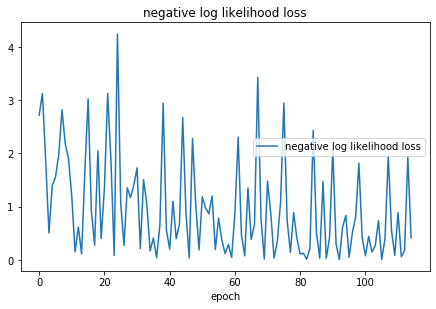

negative log likelihood loss
	negative log likelihood loss 	 (min:    0.006, max:    4.248, cur:    0.412)


In [47]:
from livelossplot import PlotLosses

liveplot = PlotLosses()

for epoch in range(5): 
    for i, (recipe, tags) in enumerate(training_data):
        
        model.zero_grad()
        
        encoded_recipe = converter.words_to_index(recipe) # слово -> его номер в словаре 
        encoded_tags   = converter.tags_to_index(tags)    # тэг   -> его номер в списке тэгов
        tag_scores     = model(encoded_recipe)
        
        loss = loss_function(tag_scores, encoded_tags)
        loss.backward()
        optimizer.step()
        
        
        if i % 100 == 0:
            liveplot.update({'negative log likelihood loss': loss})
            liveplot.draw()
            

In [48]:
def predict_tags(model, converter, recipe):
    
    encoded_recipe = converter.words_to_index(recipe)        # слово -> его номер в словаре

    encoded_tags   = model.predict_tags(encoded_recipe)      # предсказанные тэги (номера)

    decoded_tags   = converter.indices_to_tags(encoded_tags) # номер тэга -> тэг
    
    return decoded_tags

In [49]:
for i in range(0,10):

    recipe, tags = test_data[np.random.randint(0,1000)]
    
    tags_pred    = predict_tags(model, converter, recipe)

    print('истинные тэги:')
    text, spans = generate_markup(recipe, tags) 
    show_markup(text, spans)

    print('предсказанные тэги:')
    text, spans = generate_markup(recipe, tags_pred) 

    show_markup(text, spans)
    print()

истинные тэги:


BoxMarkup('Зимой приходиться долго прогревать',
          [Span(0, 17, 'Other'), Span(18, 34, 'Driveability')])

предсказанные тэги:


BoxMarkup('Зимой приходиться долго прогревать',
          [Span(0, 5, 'Other'),
           Span(6, 23, 'Reliability'),
           Span(24, 34, 'Other')])


истинные тэги:


BoxMarkup('На солнце слепит .', [Span(0, 18, 'Other')])

предсказанные тэги:


BoxMarkup('На солнце слепит .',
          [Span(0, 9, 'Other'),
           Span(10, 16, 'Appearance'),
           Span(17, 18, 'Other')])


истинные тэги:


BoxMarkup('Объем 1600 куб .', [Span(0, 16, 'Other')])

предсказанные тэги:


BoxMarkup('Объем 1600 куб .',
          [Span(0, 5, 'Driveability'), Span(6, 16, 'Other')])


истинные тэги:


BoxMarkup('Салон просторный , но не для габоритных людей , форма автомобиля спортивная и смотрится не плохо .',
          [Span(0, 16, 'Comfort'),
           Span(17, 21, 'Other'),
           Span(22, 45, 'Comfort'),
           Span(46, 47, 'Other'),
           Span(48, 64, 'Appearance'),
           Span(65, 77, 'Other'),
           Span(78, 87, 'Appearance'),
           Span(88, 98, 'Other')])

предсказанные тэги:


BoxMarkup('Салон просторный , но не для габоритных людей , форма автомобиля спортивная и смотрится не плохо .',
          [Span(0, 16, 'Comfort'),
           Span(17, 47, 'Other'),
           Span(48, 64, 'Whole'),
           Span(65, 77, 'Other'),
           Span(78, 87, 'Appearance'),
           Span(88, 98, 'Other')])


истинные тэги:


BoxMarkup('Применять другое масло не рекомендуется , это может сократить срок службы двигателя',
          [Span(0, 16, 'Other'),
           Span(17, 22, 'Driveability'),
           Span(23, 61, 'Other'),
           Span(62, 83, 'Reliability')])

предсказанные тэги:


BoxMarkup('Применять другое масло не рекомендуется , это может сократить срок службы двигателя',
          [Span(0, 16, 'Other'),
           Span(17, 22, 'Reliability'),
           Span(23, 73, 'Other'),
           Span(74, 83, 'Driveability')])


истинные тэги:


BoxMarkup('На днях коллега купил такое "чудо", да , за 400 тысяч такое предложат только китайцы , климат -контроль , гидроусилитель руля , огромная жидкокристаллическая панель в центре , аудиосистема из шести динамиков , салон из перфорированной кожи , люк на крыше',
          [Span(0, 86, 'Other'),
           Span(87, 103, 'Comfort'),
           Span(104, 105, 'Other'),
           Span(106, 125, 'Driveability'),
           Span(126, 136, 'Other'),
           Span(137, 164, 'Comfort'),
           Span(165, 175, 'Other'),
           Span(176, 188, 'Comfort'),
           Span(189, 209, 'Other'),
           Span(210, 215, 'Comfort'),
           Span(216, 218, 'Other'),
           Span(219, 239, 'Comfort'),
           Span(240, 241, 'Other'),
           Span(242, 254, 'Comfort')])

предсказанные тэги:


BoxMarkup('На днях коллега купил такое "чудо", да , за 400 тысяч такое предложат только китайцы , климат -контроль , гидроусилитель руля , огромная жидкокристаллическая панель в центре , аудиосистема из шести динамиков , салон из перфорированной кожи , люк на крыше',
          [Span(0, 86, 'Other'),
           Span(87, 105, 'Comfort'),
           Span(106, 136, 'Driveability'),
           Span(137, 157, 'Reliability'),
           Span(158, 164, 'Comfort'),
           Span(165, 166, 'Reliability'),
           Span(167, 173, 'Driveability'),
           Span(174, 188, 'Reliability'),
           Span(189, 197, 'Comfort'),
           Span(198, 207, 'Reliability'),
           Span(208, 254, 'Comfort')])


истинные тэги:


BoxMarkup('Ну и самый главный плюс это доступная цена буквально за четыресто пятдесять тысяч вы получаете авто в полной комплектации',
          [Span(0, 37, 'Other'),
           Span(38, 42, 'Costs'),
           Span(43, 94, 'Other'),
           Span(95, 121, 'Costs')])

предсказанные тэги:


BoxMarkup('Ну и самый главный плюс это доступная цена буквально за четыресто пятдесять тысяч вы получаете авто в полной комплектации',
          [Span(0, 27, 'Other'),
           Span(28, 42, 'Costs'),
           Span(43, 94, 'Other'),
           Span(95, 99, 'Whole'),
           Span(100, 101, 'Other'),
           Span(102, 108, 'Whole'),
           Span(109, 121, 'Comfort')])


истинные тэги:


BoxMarkup('Думаю это весьма накладно',
          [Span(0, 16, 'Other'), Span(17, 25, 'Costs')])

предсказанные тэги:


BoxMarkup('Думаю это весьма накладно', [Span(0, 25, 'Other')])


истинные тэги:


BoxMarkup('Во -первых, о "проходимости" этой модели придется развеять миф сразу .',
          [Span(0, 13, 'Other'),
           Span(14, 28, 'Driveability'),
           Span(29, 70, 'Other')])

предсказанные тэги:


BoxMarkup('Во -первых, о "проходимости" этой модели придется развеять миф сразу .',
          [Span(0, 13, 'Other'),
           Span(14, 28, 'Driveability'),
           Span(29, 33, 'Other'),
           Span(34, 40, 'Whole'),
           Span(41, 70, 'Other')])


истинные тэги:


BoxMarkup('Езжу год и машина очень нравится .',
          [Span(0, 10, 'Other'), Span(11, 17, 'Whole'), Span(18, 34, 'Other')])

предсказанные тэги:


BoxMarkup('Езжу год и машина очень нравится .',
          [Span(0, 10, 'Other'), Span(11, 17, 'Whole'), Span(18, 34, 'Other')])

### Статистика

##### 1.  Количество верно предсказанных тэгов:

In [50]:
from dlnlputils.sentiment_utils import tag_statistics

In [51]:
total_correct, total_tags = tag_statistics(model, converter, test_data)


print('Статистика верно предсказанных тэгов:\n')

for tag in total_tags.keys():
    print('для {}:'.format(tag))
    print('  корректно:\t', total_correct[tag])
    print('      всего:\t',   total_tags[tag])
    print('% корректно:\t', 100 * (total_correct[tag] / float(total_tags[tag])))
    print()

print('----------')
print('в итоге:')
print('  корректно:\t', sum(total_correct.values()))
print('      всего:\t', sum(total_tags.values()))
print('% корректно:\t', 100 * (sum(total_correct.values()) / sum(total_tags.values())))

Статистика верно предсказанных тэгов:

для Other:
  корректно:	 16707
      всего:	 19922
% корректно:	 83.86206204196365

для B-Whole:
  корректно:	 522
      всего:	 673
% корректно:	 77.56315007429421

для B-Driveability:
  корректно:	 442
      всего:	 1066
% корректно:	 41.46341463414634

для I-Driveability:
  корректно:	 292
      всего:	 711
% корректно:	 41.068917018284104

для B-Appearance:
  корректно:	 163
      всего:	 275
% корректно:	 59.27272727272728

для I-Appearance:
  корректно:	 31
      всего:	 100
% корректно:	 31.0

для B-Reliability:
  корректно:	 329
      всего:	 809
% корректно:	 40.66749072929542

для I-Whole:
  корректно:	 104
      всего:	 213
% корректно:	 48.82629107981221

для B-Comfort:
  корректно:	 620
      всего:	 1067
% корректно:	 58.10684161199625

для I-Comfort:
  корректно:	 181
      всего:	 497
% корректно:	 36.41851106639839

для I-Reliability:
  корректно:	 133
      всего:	 475
% корректно:	 28.000000000000004

для B-Costs:
  корректно:	 

##### 2.  Количество верно предсказанных тэгов в виде матрицы ошибок:

In [52]:
from dlnlputils.sentiment_utils import plot_confusion_matrix

In [53]:
y_pred = []
y_true = []

for sentence, tags in test_data:
    y_pred += predict_tags(model, converter, sentence)
    y_true += tags

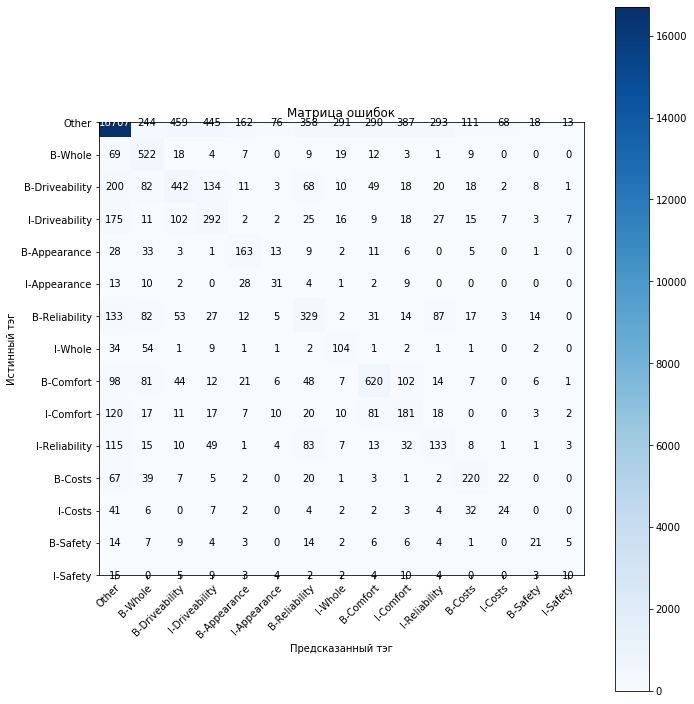

In [54]:
plot_confusion_matrix(y_true, y_pred, classes=list(total_tags.keys()), title='Матрица ошибок')

plt.show()

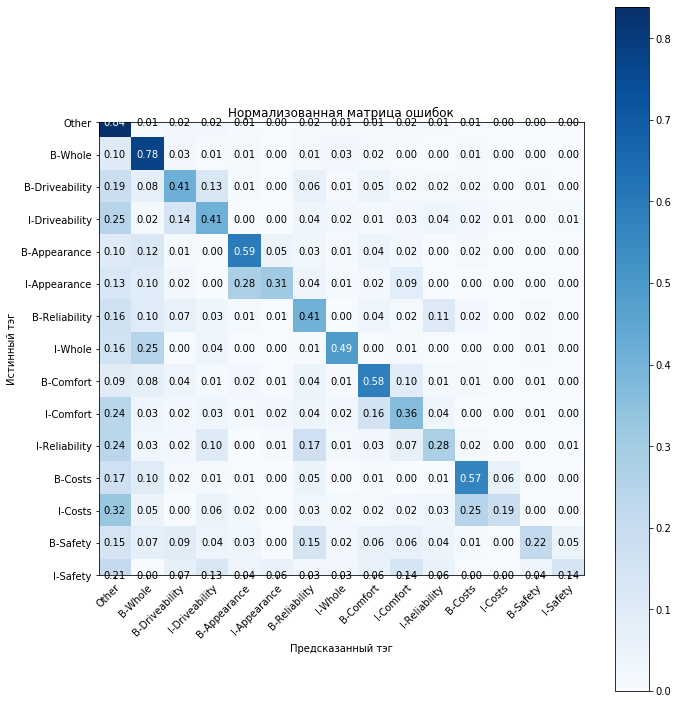

In [55]:
plot_confusion_matrix(y_true, y_pred, classes=list(total_tags.keys()), normalize=True, 
                      title='Нормализованная матрица ошибок')

plt.show()